In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from sklearn.datasets import make_blobs

In [20]:
X,y=make_blobs(n_samples=50, centers=3, n_features=2, random_state=2)
print(X)
print(y)
print(X.shape)
print(y.shape)

[[ -0.43112247  -3.00722553]
 [ -2.72577723  -2.96021103]
 [ -2.69138291  -1.80881652]
 [ -1.91775697 -10.66908765]
 [ -3.71486953  -9.36874886]
 [ -1.8967304   -0.80800871]
 [ -2.70131918  -9.63497056]
 [  0.61758013  -1.36802291]
 [ -2.33805418 -10.39048298]
 [  0.95367932  -0.96754871]
 [ -3.33060346  -2.35247963]
 [ -0.77722054 -10.72676345]
 [  0.35857025  -0.7851559 ]
 [  0.33999929  -0.45109587]
 [  1.42674589  -0.01517292]
 [  0.61173308  -1.22706314]
 [ -0.74104364 -10.07763506]
 [  1.60459034  -1.24558156]
 [ -2.15820985  -9.63790953]
 [ -1.38843598  -1.98660734]
 [  1.51754599  -0.55827257]
 [ -1.2800922   -8.93912279]
 [ -4.25209341  -3.4847562 ]
 [ -2.05464931  -3.04241509]
 [  0.67974136  -0.52254041]
 [ -2.02797291  -9.47245011]
 [ -1.54915892  -7.25010857]
 [ -1.04707349  -1.24729662]
 [ -0.8748411    0.43763252]
 [  0.31557398  -2.73299117]
 [ -1.29923245  -8.30647414]
 [  1.99361544  -1.67464467]
 [ -0.72864791  -7.18926735]
 [ -0.77824475 -10.32568907]
 [ -1.23856256

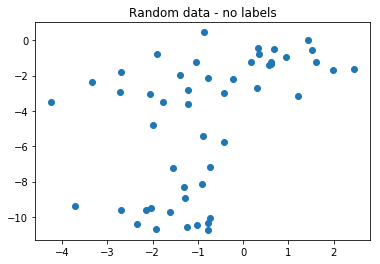

In [5]:
plt.scatter(X[:,0],X[:,1])
plt.title("Random data - no labels")
plt.show()

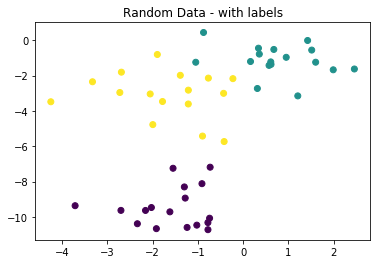

In [7]:
plt.scatter(X[:,0],X[:,1], c=y)
plt.title("Random Data - with labels")
plt.show() #임의적 레이블 표현. 

### K-means Clustering ( k value)

In [12]:
#model and learning (X-value만)
kmeans=KMeans(n_clusters=3) #몇 개의 클러스터로 묶을것인지 지정해 주어야
kmeans.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
print(kmeans.labels_)
print(y)
print(kmeans.cluster_centers_) # 각 클러스터의 센터 

[1 1 1 0 0 1 0 2 0 2 1 0 2 2 2 2 0 2 0 1 2 0 1 1 2 0 0 2 2 2 0 2 0 0 0 2 0
 0 1 1 1 2 2 1 2 1 1 2 0 1]
[2 2 2 0 0 2 0 1 0 1 2 0 1 1 1 1 0 1 0 2 1 0 2 2 1 0 0 1 1 1 0 1 0 0 0 1 0
 0 2 2 2 1 1 2 2 2 2 1 0 2]
[[-1.57661756 -9.46458037]
 [-1.80379814 -3.16300661]
 [ 0.70446625 -1.21923827]]


In [15]:
#General
acc=np.sum(np.array(kmeans.labels_ ==y))/y.size
#print(acc)

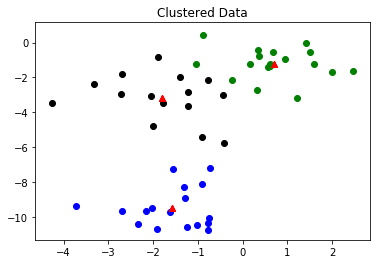

In [21]:
colors=['blue','black','green']

for colors, i in zip(colors, [0,1,2]):
    plt.scatter(X[kmeans.labels_ == i,0], X[kmeans.labels_ ==i,1], color=colors)
    
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='^',color='red')
    

plt.title("Clustered Data")
plt.show()

### Prediction

In [24]:
np.random.seed(23)
XX=np.random.randint(-5,5,(5,2))  #random int generator #(5,2)로 배열
X_test=XX-np.array([0,5])
print(X_test)

[[-2 -4]
 [ 3 -1]
 [ 1 -2]
 [ 2 -1]
 [-2 -4]]


In [25]:
y_pred=kmeans.predict(X_test)
print(X_test)
print(y_pred)

[[-2 -4]
 [ 3 -1]
 [ 1 -2]
 [ 2 -1]
 [-2 -4]]
[1 2 2 2 1]


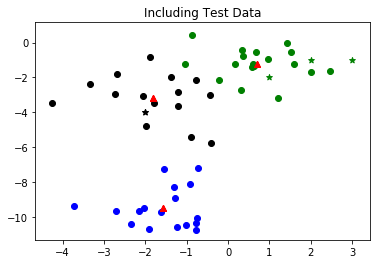

In [27]:
colors=['blue','black','green']

for colors, i in zip(colors, [0,1,2]):
    plt.scatter(X[kmeans.labels_ == i,0], X[kmeans.labels_ ==i,1], color=colors)
    
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='^',color='red')
    
    plt.scatter(X_test[y_pred==i,0],X_test[y_pred ==i,1], color=colors, marker='*')

plt.title("Including Test Data")
plt.show()